# Setup

In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\kavan\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [5]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer

# Data

In [15]:
data = load_breast_cancer()
print('type:', type(data))
print('keys:', data.keys())
print('shape:', data.data.shape)

type: <class 'sklearn.utils._bunch.Bunch'>
keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
shape: (569, 30)


In [23]:
print('ground truth:', data.target)
print('classes:', data.target_names)
print('features:', data.feature_names)

ground truth: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
# Split the dataset into a train and test set. Pass in feature data and targets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [29]:
# Scale dataset for comparable weights in features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Define our own sequential model
model = tf.keras.models.Sequential([
    # Layers
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [40]:
r = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9264 - accuracy: 0.3832 - val_loss: 0.8699 - val_accuracy: 0.4202
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8317 - accuracy: 0.4409 - val_loss: 0.7917 - val_accuracy: 0.5053
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7500 - accuracy: 0.5171 - val_loss: 0.7227 - val_accuracy: 0.5691
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5879 - val_loss: 0.6641 - val_accuracy: 0.6064
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6772 - val_loss: 0.6127 - val_accuracy: 0.6649
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7349 - val_loss: 0.5691 - val_accuracy: 0.7074
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7690 - val_loss: 0.5323 - val_accuracy: 0.7606
Epoch 8/100
1

In [41]:
print('Train score:', model.evaluate(X_train, y_train))
print('Test score:', model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 628us/step - loss: 0.1041 - accuracy: 0.9711
Train score: [0.10408096015453339, 0.9711285829544067]
6/6 [==============================] - 0s 807us/step - loss: 0.1136 - accuracy: 0.9681
Test score: [0.11357145011425018, 0.9680851101875305]


In [42]:
import matplotlib.pyplot as plt

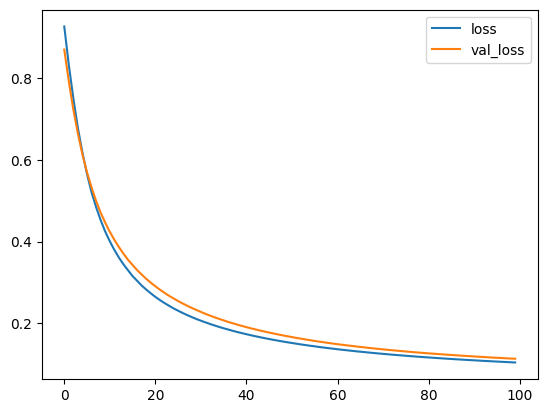

In [43]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

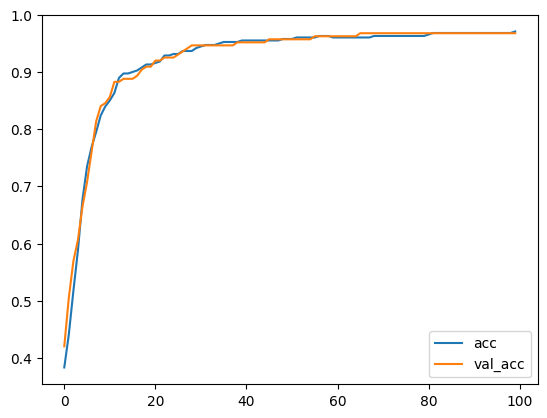

In [44]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();